# Convolutional Neural Networks (CNN)

## The 5-Step Model Life-Cycle
The five steps in the life-cycle are as follows:

Define the model\
Compile the model\
Fit the model\
Evaluate the model\
Make predictions

### Convolution with Keras

 28x28 boyutunda olan "Fashion-MNIST" veri seti ile Dense() katmanlarını kullanarak sınıflandırma yapacağız

Shape of Train Set (X) : (60000, 28, 28)
Shape of Train Set (y) : (60000,)
Shape of Test Set (X)   : (10000, 28, 28)
Shape of Test Set (y)   : (10000,)


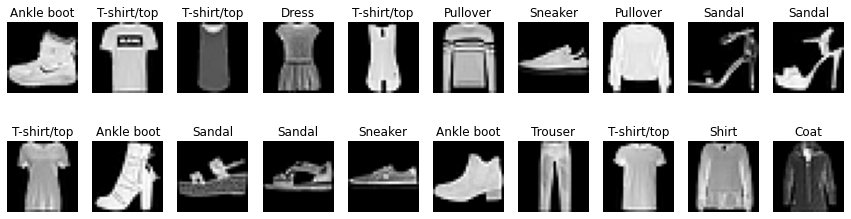

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Shape of Train Set (X) :", X_train.shape)
print("Shape of Train Set (y) :", y_train.shape)
print("Shape of Test Set (X)   :", X_test.shape)
print("Shape of Test Set (y)   :", y_test.shape)

fashion_list = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",
                 4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",
                 8:"Bag",9:"Ankle boot"}

plt.figure(figsize=(15,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("{}".format(fashion_list[y_train[i]]))
    plt.axis('off')
           
plt.show()

Verileri inceledikten sonra modelimizi oluşturmaya başlayabiliriz.

İlk önce resimlere evrişim yapacağız. Bunu yapmak için keras kitaplığının katmanlar modülünde Conv2D katmanını kullanacağız. Girdi boyutu ve renk kanallarının sayısı olarak görüntülerin genişliğini ve yüksekliğini piksel cinsinden belirtiyoruz. Görüntüler siyah beyaz olduğu için renk kanal sayısı 1 olacaktır. Resimler renkli olsaydı, her resmin RGB (Kırmızı, Yeşil ve Mavi) olmak üzere üç kanalı olurdu. Resimlerimizde tek kanal olduğu için ölçülere baktığımızda kanal sayısı gözükmemektedir. Ancak Conv2D katmanındaki kanal sayısını da belirtmemiz gerekecek.


In [3]:
X_train = X_train.reshape(X_train.shape[0], 
                            X_train.shape[1], 
                            X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], 
                        X_test.shape[1], 
                        X_test.shape[2], 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Hedef değişkenimizi kategorik bir değere dönüştürelim.

In [4]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

Modelimizin girdi boyutları olarak görüntü boyutlarını alalım.

In [5]:
img_row = X_train.shape[1]
img_column = X_train.shape[2]
channel_number = X_train.shape[3]
print(img_row, img_column, channel_number)

28 28 1


Şimdi Sequential bir model oluşturmaya başlayabiliriz.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [7]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size=5, activation='relu', strides = (2,2), 
               input_shape=(img_row, img_column,channel_number)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
                 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 8)         208       
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                11530     
Total params: 11,738
Trainable params: 11,738
Non-trainable params: 0
_________________________________________________________________


İlk önce modelimize bir evrişim katmanı ekledik. Daha sonra düzleştirme için Flatten() katmanını ve son olarak da derecelendirme için 10 neuron katmanı ekledik.

Artık modelimizi derleyebilir ve verileri sığdırabiliriz.

In [8]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train_categorical, 
          validation_split=0.2, 
          epochs=3, batch_size=32)

Epoch 1/3
1500/1500 [==============================] - 6s 4ms/step - loss: 3.5242 - accuracy: 0.6797 - val_loss: 0.5310 - val_accuracy: 0.8119
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4858 - accuracy: 0.8261 - val_loss: 0.4615 - val_accuracy: 0.8389
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4227 - accuracy: 0.8454 - val_loss: 0.4409 - val_accuracy: 0.8431


### Evaluate the Model

In [25]:
accuracy_train = model.evaluate(X_train, y_train_categorical, verbose = 0)[1]
accuracy_test = model.evaluate(X_test, y_test_categorical, verbose = 0)[1]

print("\nAccuracy for train set : %{:.3f}".format(accuracy_train*100))
print("Accuracy for test set   : %{:.3f}".format(accuracy_test*100))


Accuracy for train set : %88.245
Accuracy for test set   : %85.010
